In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn import pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


In [2]:
df = pd.read_csv('Data/boston.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
X = df[['AGE', 'LSTAT']].values
y = df['MEDV'].values

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()
pipeline = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),  # Log Transformation
    ('scaler', MinMaxScaler()),  # Min-Max Scaling
    ('poly_features', PolynomialFeatures(degree=5)),  # Polynomial Features
    ('regressor', model)  # Linear Regression
])
pipeline.fit(X_train, y_train)

# Predict on the evaluation data
y_pred = pipeline.predict(X_test)

In [6]:
y_train_pred = pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = pipeline.predict(X_test)

# Calculate R-squared for the test data 4.566213908719438
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R2) for Training Data:", r2_train)
print("R-squared (R2) for Test Data:", r2_test)

R-squared (R2) for Training Data: 0.7210806547759547
R-squared (R2) for Test Data: 0.7230872543824585


In [7]:
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mae_train =metrics.mean_absolute_error(y_train, y_train_pred)
# Print the MAE scores and comments
print("Mean Absolute Error (MAE) for Training Data:", mae_train)
print("Mean Absolute Error (MAE) for Test Data:", mae_test)

Mean Absolute Error (MAE) for Training Data: 3.455768395406418
Mean Absolute Error (MAE) for Test Data: 3.116720947006937


In [8]:
rmse_train = metrics.mean_squared_error(y_train,y_train_pred)
# Calculate RMSE for the test data
rmse_test = metrics.mean_squared_error(y_test,y_test_pred)

# Print the RMSE scores
print("Root Mean Squared Error (RMSE) for Training Data:", rmse_train)
print("Root Mean Squared Error (RMSE) for Test Data:", rmse_test)

Root Mean Squared Error (RMSE) for Training Data: 24.392120060051372
Root Mean Squared Error (RMSE) for Test Data: 18.32611025783832


In [9]:
mape_train = metrics.mean_absolute_percentage_error(y_train,y_train_pred)

mape_test = metrics.mean_absolute_percentage_error(y_test,y_test_pred)
print( mape_train)
print( mape_test)

0.16293645389392913
0.1718166157280792


<Axes: >

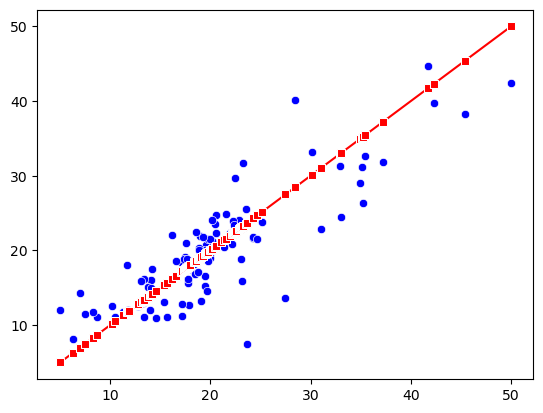

In [10]:
sb.lineplot(x=y_test.flatten(), y=y_test.flatten(), marker='s', color='r')
sb.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), marker='o', color='b')


<Axes: >

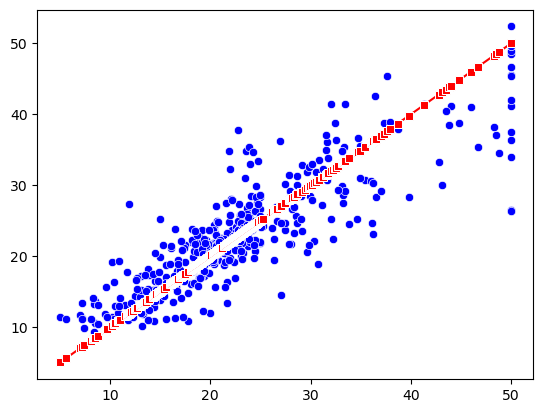

In [15]:
sb.lineplot(x=y_train.flatten(), y=y_train.flatten(), marker='s', color='r')
sb.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), marker='o', color='b')

In [11]:
y_test_pred = pipeline.predict(X_test)
dfTestValidation = pd.DataFrame(list(zip(X_test[: ,0], X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns = ['T5_test', 'T6_test', 'y_test', 'y_test_predicted'])
dfTestValidation['Residual'] = dfTestValidation['y_test']- dfTestValidation['y_test_predicted']
dfTestValidation


,T5_test,T6_test,y_test,y_test_predicted,Residual
0,100.0,7.39,23.3,31.657712,-8.357712
1,93.9,22.88,12.8,12.514300,0.285700
2,77.8,29.97,6.3,8.132876,-1.832876
3,51.8,6.58,35.2,26.400660,8.799340
4,98.4,14.59,17.1,18.482193,-1.382193
...,...,...,...,...,...
97,88.4,14.65,17.7,18.884405,-1.184405
98,25.8,9.97,19.3,21.846058,-2.546058
99,94.9,21.45,15.4,13.165537,2.234463
100,95.4,15.03,18.4,18.158399,0.241601


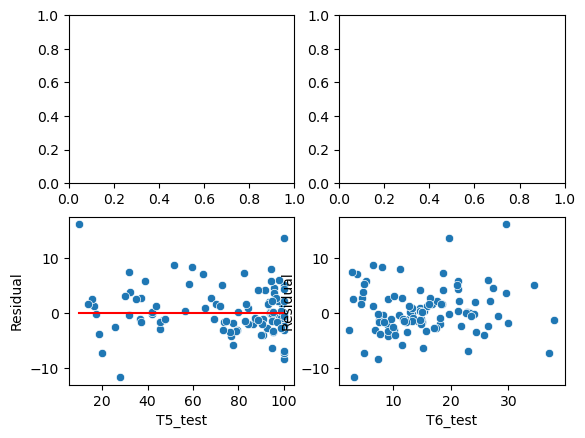

In [12]:
fig,axes = plt.subplots(2,2)
sb.scatterplot(data=dfTestValidation,x='T5_test',y='Residual',ax=axes[1,0])
sb.lineplot(data=dfTestValidation,x='T5_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sb.scatterplot(data=dfTestValidation,x='T6_test',y='Residual',ax=axes[1,1])
plt.show()

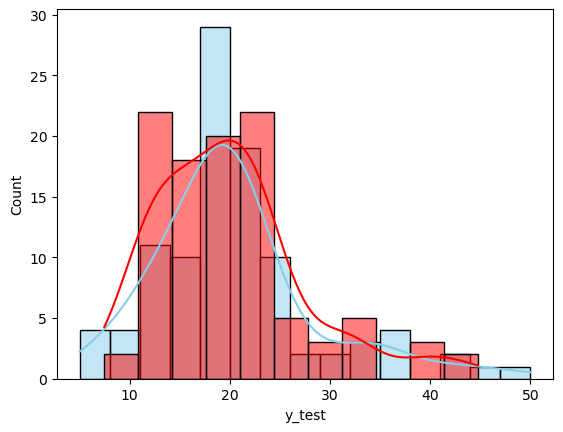

In [13]:
sb.histplot(data=dfTestValidation,x='y_test',color='skyblue',label='Actual',kde=True)
sb.histplot(data=dfTestValidation,x='y_test_predicted',color='red',label='Forecast',kde=True)
plt.show()

In [14]:
sb.histplot(data=dfTestValidation,x='y_train',color='skyblue',label='Actual',kde=True)
sb.histplot(data=dfTestValidation,x='y_train_predicted',color='red',label='Forecast',kde=True)
plt.show()

ValueError: Could not interpret value `y_train` for parameter `x`